In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import distinct
from sqlalchemy import create_engine, func , inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# create the inspector and connect it to the engine
inspector = inspect(engine)

In [7]:
# collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [8]:
# using the inspector to print the column names within the 'measurement' and 'station ' table and its types

columns = inspector.get_columns('measurement') 
for column in columns:
    print(column['name'], column['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# using the inspector to print the column names within the 'station ' table and its types

columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:

first_row = session.query(Measurements).first()
first_row.__dict__



{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd8791c14f0>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08}

In [15]:
# Find the most recent date in the data set.
recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
recent_date

('2017-08-23')

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date", query_date)

Query Date 2016-08-23


In [159]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= query_date ).\
order_by(Measurements.date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [160]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(results, columns = ['date', 'Precipitation'])
df.set_index('date', inplace = True)
df.head()


,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


<AxesSubplot:title={'center':'Precipitation for the last 12 months'}, xlabel='Date', ylabel='Inches'>

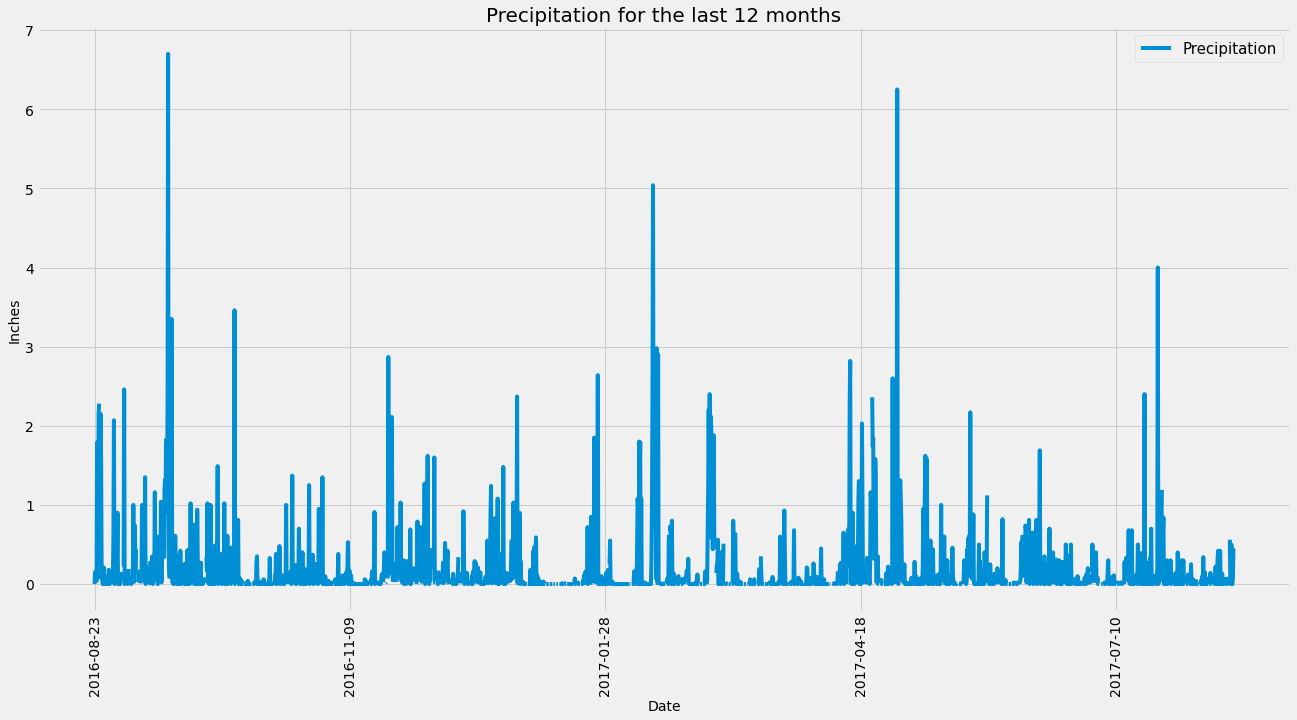

In [161]:
# Use Pandas Plotting with Matplotlib to plot the data

plot_pandas = df.plot(figsize = (20,10),rot = 90)
plt.title('Precipitation for the last 12 months', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Inches', fontsize = 14)
plt.legend(fontsize = 15)
plt.savefig("images/precipitation.png")

plot_pandas

In [162]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [163]:
first_row = session.query(Stations).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb2a68025b0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [164]:
# Design a query to calculate the total number stations in the dataset
num_of_stations = session.query(distinct(Measurements.station)).count()

print(f"The total number stations is: {num_of_stations}")

The total number stations is: 9


In [165]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

list_of_statons = session.query(Measurements.station, Stations.name, func.count(Measurements.station)).\
filter(Measurements.station == Stations.station).\
order_by(func.count(Measurements.station).desc()).\
group_by(Measurements.station).all()

list_of_statons

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [166]:
# the most active stations
Most_active_stations = list_of_statons = session.query(Measurements.station, Stations.name, func.count(Measurements.station)).\
    filter(Measurements.station == Stations.station).\
    order_by(func.count(Measurements.station).desc()).\
    group_by(Measurements.station).first()

Most_active_stations


('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [167]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [func.min(Measurements.tobs),
      func.max(Measurements.tobs),
      func.avg(Measurements.tobs)]

most_active_station = session.query(*sel).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.id).desc()).first()

most_active_station



(54.0, 85.0, 71.66378066378067)

In [40]:
sel = [Measurements.date,func.min(Measurements.tobs),
      func.max(Measurements.tobs),
      func.avg(Measurements.tobs)]

results_start = session.query(*sel).\
    group_by(Measurements.station).\
    filter(Measurements.date >=query_date).\
    order_by(func.count(Measurements.id).desc()).all()

results_start

[('2017-05-23', 60.0, 87.0, 75.21052631578948),
 ('2017-08-06', 59.0, 83.0, 73.10795454545455),
 ('2017-03-11', 58.0, 82.0, 72.09169054441261),
 ('2017-06-21', 61.0, 82.0, 73.27696793002916),
 ('2017-08-19', 60.0, 85.0, 76.97032640949556),
 ('2017-04-19', 63.0, 83.0, 77.16065573770491),
 ('2017-07-03', 62.0, 87.0, 74.78142076502732)]

In [39]:
sel = [Measurements.date,
    func.min(Measurements.tobs),
      func.max(Measurements.tobs),
      func.avg(Measurements.tobs)]

most_active_station = session.query(*sel).\
    group_by(Measurements.station).\
    filter(Measurements.date >=query_date).\
    filter(Measurements.date <= query_date).\
    order_by(func.count(Measurements.id).desc()).all()

most_active_station

[('2016-08-23', 80.0, 80.0, 80.0),
 ('2016-08-23', 81.0, 81.0, 81.0),
 ('2016-08-23', 77.0, 77.0, 77.0),
 ('2016-08-23', 80.0, 80.0, 80.0),
 ('2016-08-23', 74.0, 74.0, 74.0),
 ('2016-08-23', 80.0, 80.0, 80.0),
 ('2016-08-23', 76.0, 76.0, 76.0)]

In [171]:
# Filter by the station with the highest number of observations

result_temps = session.query(Measurements.date, Measurements.tobs).\
    filter(Measurements.station == 'USC00519281').\
    filter(Measurements.date >= query_date).all()
  
result_temps  


[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

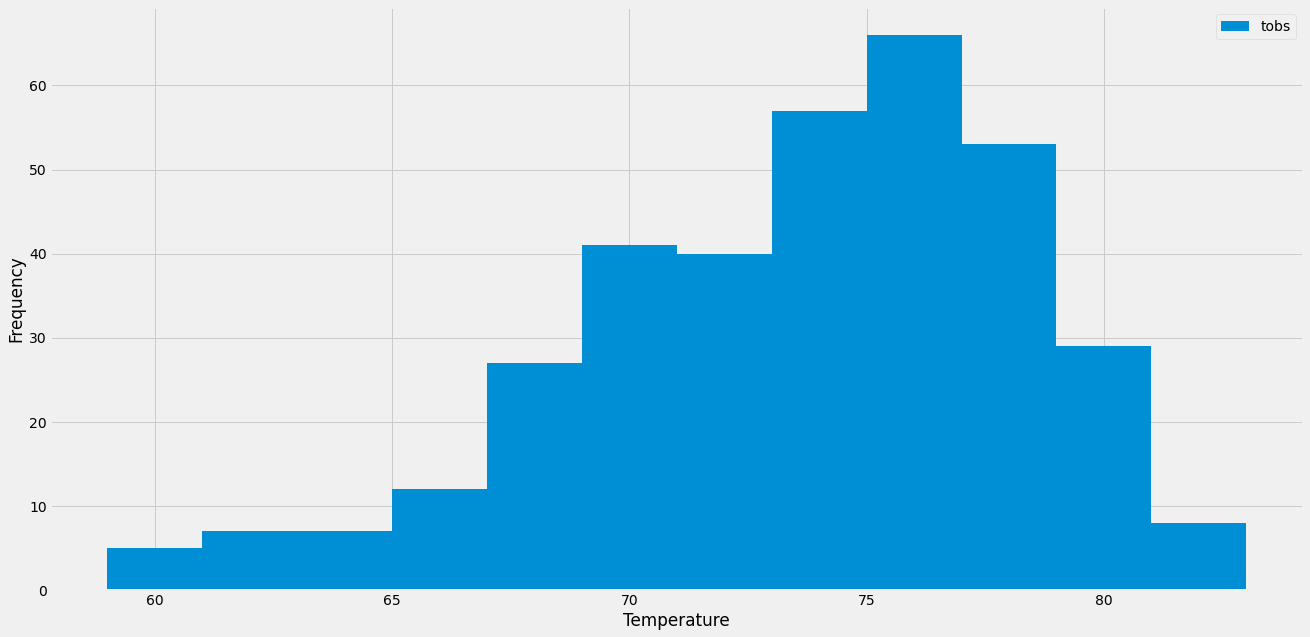

In [181]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_df = pd.DataFrame(result_temps)
temp_df = temp_df.set_index("date").sort_index(ascending = True)


temp_df.plot(kind = "hist", bins = 12, figsize = (20,10))
plt.xlabel("Temperature")
plt.savefig('images/station-hist.png')

plt.show();



# Close session

In [ ]:
# Close Session
session.close()